In [ ]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000933141"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000933141
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,IBERIABANK CORP
Ticker,IBKC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,64.0,4.292361e+03,1.471639e+04,24.88,3.488750e+01,4.843500e+01,5.573500e+01,56390.0
interest income,64.0,9.025285e+07,9.817064e+07,21642.00,5.630725e+04,9.828050e+07,1.376032e+08,330196000.0
net income,65.0,2.458185e+07,2.750967e+07,573000.00,8.128000e+06,1.300400e+07,2.964400e+07,130039000.0
net interest income,65.0,8.758145e+07,7.383842e+07,5097000.00,2.275500e+07,7.013900e+07,1.246800e+08,265021000.0
provision for loan losses,65.0,4.002912e+06,5.117216e+06,-3377000.00,1.574000e+03,1.807000e+06,6.154000e+06,18514000.0
total revenue,52.0,1.219324e+08,9.651737e+07,23919000.00,2.980000e+07,1.017970e+08,2.154892e+08,312312000.0


# Plots

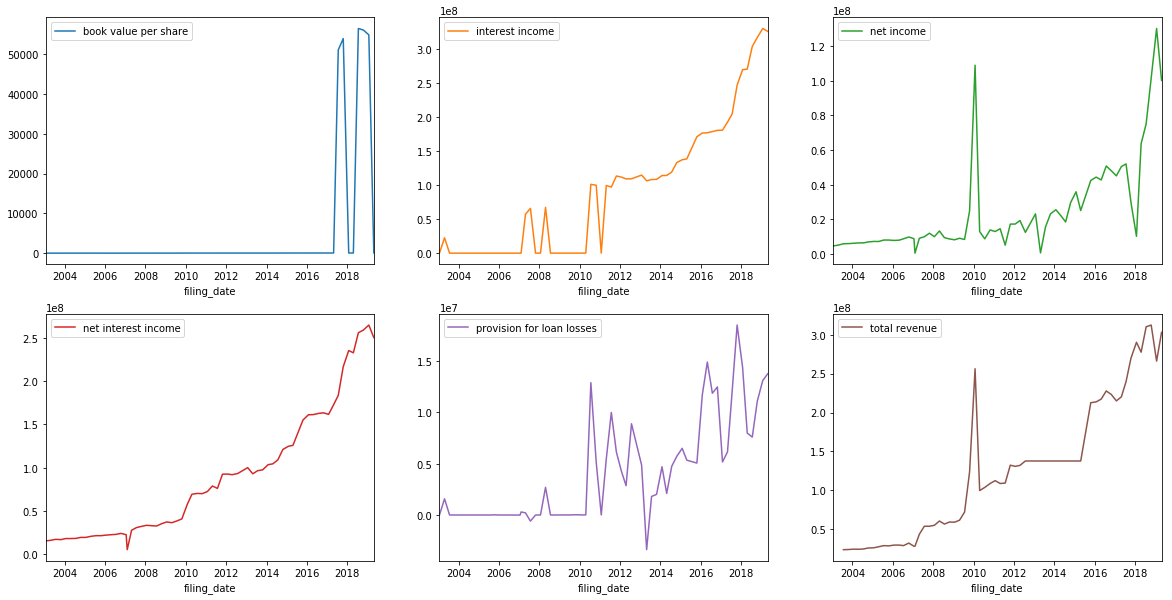

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000933141 book value per share                             2005Q3    missing   
           book value per share                             2012Q3    missing   
           book value per share                             2015Q2    missing   
           interest income                                  2012Q3    missing   
           interest income                                  2015Q2    missing   
           net income                                       2005Q3    missing   
           net income                                       2006Q3  duplicate   
           net income                                       2012Q3    missing   
           net income                                       2015Q2    missing   
           net interest income                              2005Q3    missing   
           net interest income                              2006Q3  duplicate   
           net interest income                              2012Q3    missing   
           net interest income                              2015Q2    missing   
           provision for loan losses                        2006Q3  duplicate   
           provision for loan losses                        2012Q3    missing   
           provision for loan losses                        2015Q2    missing   
           total revenue               2002Q4 to 2003Q1: 2 periods    missing   
           total revenue              2012Q3 to 2015Q2: 12 periods    missing   

                                               message  
cik        item                                         
0000933141 book value per share         Missing period  
           book value per share         Missing period  
           book value per share         Missing period  
           interest income              Missing period  
           interest income              Missing period  
           net income                   Missing period  
           net income                 Duplicate period  
           net income                   Missing period  
           net income                   Missing period  
           net interest income          Missing period  
           net interest income        Duplicate period  
           net interest income          Missing period  
           net interest income          Missing period  
           provision for loan losses  Duplicate period  
           provision for loan losses    Missing period  
           provision for loan losses    Missing period  
           total revenue                Missing period  
           total revenue                Missing period

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()